# Lab 3. Genetic Algorithms
# Task 3.2 The 8-Queens Problem
## Problem Descriptions
consider 8*8 chess board. In n queen problem, we try to place queen on chessboard so that no other queen have clashes. Rules are according to the chess board game, a queen can move horizontal, vertical and diagnolly. Iplement a programme using GA to solve this n queen problem, where n = 8.

## Implementation and Results


  * Encoding scheme
    
  Data structure used in this problem is array of numbers.
  we will encode the placement of queen with numbers ranging from 0 - 7 in an array . Where array index represents the column number and index value represents the row number.

  * initial population

  if we generate initial population with restriction of one queen per column and one queen per row, the solution could be reached in much less time, as GA would have to deal with only diagnol clashes.

  * fitness function

  To solve n queen problem, fitness function is number of clashes between the queens on a board. so, by design it is a minimisation problem. Less the number of clashes better the chromosome fitness score. 
-------

  * Mutation

  for mutation we are using here "mutShuffleIndexes" with probability of "2.0/8" , this Shuffle the attributes of the input individual and return the result.

  * crossover

  for crossover we have used "cxTwoPoint" , it is two point crossover. The two individuals are modified in place and both keep in their original length and returned.

--------

  * selection

  for selection we are using tournament selection, which will ensure the best individual in the population. Here, selection will be based on the fitness score from the fitness function.





In [1]:
!pip install deap
import random
import numpy as np
from deap import algorithms, base, creator, tools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 12.4 MB/s eta 0:00:00


In [ ]:
import time

In [5]:
NB_QUEENS = 8

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    #print(fd)
    #print(rd)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      #print(fd[i+individual[i]]+1)
      #print(fd[i+individual[i]])
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1
      
    #print(fd)
    #print(rd)
    
    

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),
    

In [ ]:
test = [3, 5, 7, 4, 6, 1, 0, 2]
r = evalNQueens(test)
r

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
1.0
1.0
1.0
1.0
2.0
3.0
2.0
[0. 0. 0. 1. 0. 0. 3. 1. 0. 2. 1. 0. 0. 0. 0.]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]


(5.0,)

In [ ]:
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)


In [ ]:
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)

st = time.time()

algorithms.eaSimple(pop, toolbox, cxpb=0.2, mutpb=0.5, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

Execution time: 0.7088501453399658 seconds
Best: [3, 1, 6, 2, 5, 7, 0, 4]. Fitness value: 0.0


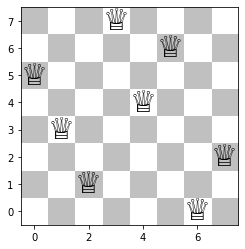

In [ ]:
# display the result
import matplotlib.pyplot as plt

chessboard = np.ones((NB_QUEENS, NB_QUEENS))
chessboard[1::2,0::2] = 0.75
chessboard[0::2,1::2] = 0.75
plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1)
for x in range(NB_QUEENS):
    plt.text(x, best[x], '♕', fontsize=30, ha='center', va='center')

In [9]:
NB_QUEENS = 12

NB_QUEENS = 12

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    #print(fd)
    #print(rd)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      #print(fd[i+individual[i]]+1)
      #print(fd[i+individual[i]])
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1
      
    #print(fd)
    #print(rd)
    
    

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),




In [12]:
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)



algorithms.eaSimple(pop, toolbox, cxpb=0.2, mutpb=0.5, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]


print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

Best: [4, 7, 1, 6, 11, 0, 8, 3, 5, 10, 2, 9]. Fitness value: 0.0


## Discussions

      * clearly, if the initial population is having 
      restriction of one queen per column and row  
          respectively, solution can be attained quickly.
      * we tried with both 8 queen and 18 queen

-----

     *  for selection we have used tournament selection,
      but roulette wheel can also be used.

-------

      * change of mutating probability and crossover 
      probability doesn't have any significant effect on 
      execution time, which turn around to be between 0.7 to 0.65

-----

    * final Verdict

    best solution is  [3, 1, 6, 2, 5, 7, 0, 4] with 
    execution time of 0.70
